# Example / Zoomable Mandelbrot set

Mandelbrot code inspired from [NumPy: Compute Mandelbrot set by Vectorization](https://www.learnpythonwithrune.org/numpy-compute-mandelbrot-set-by-vectorization/), 
by @PythonWithRune

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A mandelbrot plot : function definition
def mandelbrot(height, width, x=-0.5, y=0, zoom=1, max_iterations=100):
    # To make navigation easier we calculate these values
    x_width = 1.5
    y_height = 1.5 * height / width
    x_from = x - x_width / zoom
    x_to = x + x_width / zoom
    y_from = y - y_height / zoom
    y_to = y + y_height / zoom
    # Here the actual algorithm starts
    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    c = x + 1j * y
    # Initialize z to all zero
    z = np.zeros(c.shape, dtype=np.complex128)
    # To keep track in which iteration the point diverged
    div_time = np.zeros(z.shape, dtype=int)
    # To keep track on which points did not converge so far
    m = np.full(c.shape, True, dtype=bool)
    for i in range(max_iterations):
        z[m] = z[m] ** 2 + c[m]
        diverged = np.greater(np.abs(z), 2, out=np.full(c.shape, False), where=m)  # Find diverging
        div_time[diverged] = i  # set the value of the diverged iteration number
        # m[np.abs(z) > 2] = False    # to remember which have diverged
        m[diverged] = False
    return div_time

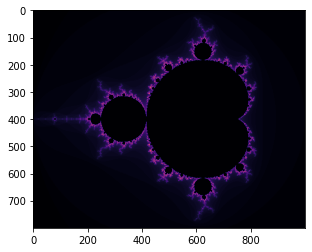

In [3]:
# Show mandel in a matplotlib plot
plt.imshow(mandelbrot(800, 1000), cmap="magma")
# The image below of Mandelbrot set
# plt.imshow(mandelbrot(800, 1000, -0.75, 0.0, 2, 200), cmap='magma')
# The image below of below of Mandelbrot set
# plt.imshow(mandelbrot(800, 1000, -1, 0.3, 20, 500), cmap='magma')
plt.show()

In [6]:
# show that we can re invoke immvision after exception in the user code!
import imgui
import immvision.imgui_runner
import immvision

ax = plt.imshow(mandelbrot(800, 1000), cmap="magma")

create_exception = False


def broken_gui():
    global create_exception
    immvision.figure_display("figure", ax.figure)
    _, create_exception = imgui.checkbox("Check this to create an exception!", create_exception)
    if create_exception:
        imgui.image(1, 2, 3, 4)
    if imgui.button("Exit"):
        immvision.imgui_runner.exit_app()


immvision.imgui_runner.run(broken_gui)

pythonContextPointer differs from ImGui::GetCurrentContext()! The graphical app was perhaps restarted...
Python GenTexture()
Python DeleteTexture()


In [7]:
# Show mandel in a immvision
import imgui
import immvision.imgui_runner
import immvision

ax = plt.imshow(mandelbrot(800, 1000), cmap="magma")
immvision.imgui_runner.run(lambda: immvision.figure_display("figure", ax.figure))

pythonContextPointer differs from ImGui::GetCurrentContext()! The graphical app was perhaps restarted...
Python GenTexture()
Python DeleteTexture()


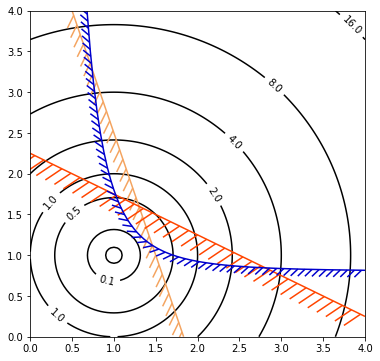

In [8]:
# a totally different plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(0.001, 4.0, nx)
yvec = np.linspace(0.001, 4.0, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = x1**2 + x2**2 - 2 * x1 - 2 * x2 + 2
g1 = -(3 * x1 + x2 - 5.5)
g2 = -(x1 + 2 * x2 - 4.5)
g3 = 0.8 + x1**-3 - x2

cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors="black")
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors="sandybrown")
plt.setp(cg1.collections, path_effects=[patheffects.withTickedStroke(angle=135)])

cg2 = ax.contour(x1, x2, g2, [0], colors="orangered")
plt.setp(cg2.collections, path_effects=[patheffects.withTickedStroke(angle=60, length=2)])

cg3 = ax.contour(x1, x2, g3, [0], colors="mediumblue")
plt.setp(cg3.collections, path_effects=[patheffects.withTickedStroke(spacing=7)])

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

plt.show()

In [11]:
# which we show in immvision
import imgui
import immvision.imgui_runner


def gui():
    immvision.figure_display("a totally different plot", fig)


immvision.imgui_runner.run(gui)

pythonContextPointer differs from ImGui::GetCurrentContext()! The graphical app was perhaps restarted...
Python GenTexture()
Python DeleteTexture()
